3. Random forest and one-class SVM for email spam classifier (30 points)
Your task for this question is to build a spam classifier using the UCR email spam dataset https:
//archive.ics.uci.edu/ml/datasets/Spambase came from the postmaster and individuals who had
filed spam. Please download the data from this link. Headers are not necessary for this problem, but
can be obtained by the ’spambase.names’ file. The collection of non-spam emails came from filed work
and personal emails, and hence the word ’george’ and the area code ’650’ (Palo Alto, CA) are indicators
of non-spam. These are useful when constructing a personalized spam filter. You are free to choose
any package for this homework. Note: there may be some missing values. You can just fill in zero.
You should use the same train-test split for every part.

3.1. (5 points) Build a CART model and visualize the fitted classification tree. Please adjust the plot
size/font as appropriate to ensure it is legible. Pruning this tree is not required, and if done
reasoning should be stated as to why.

CART Model Accuracy: 0.9001
CART Test Error: 0.0999


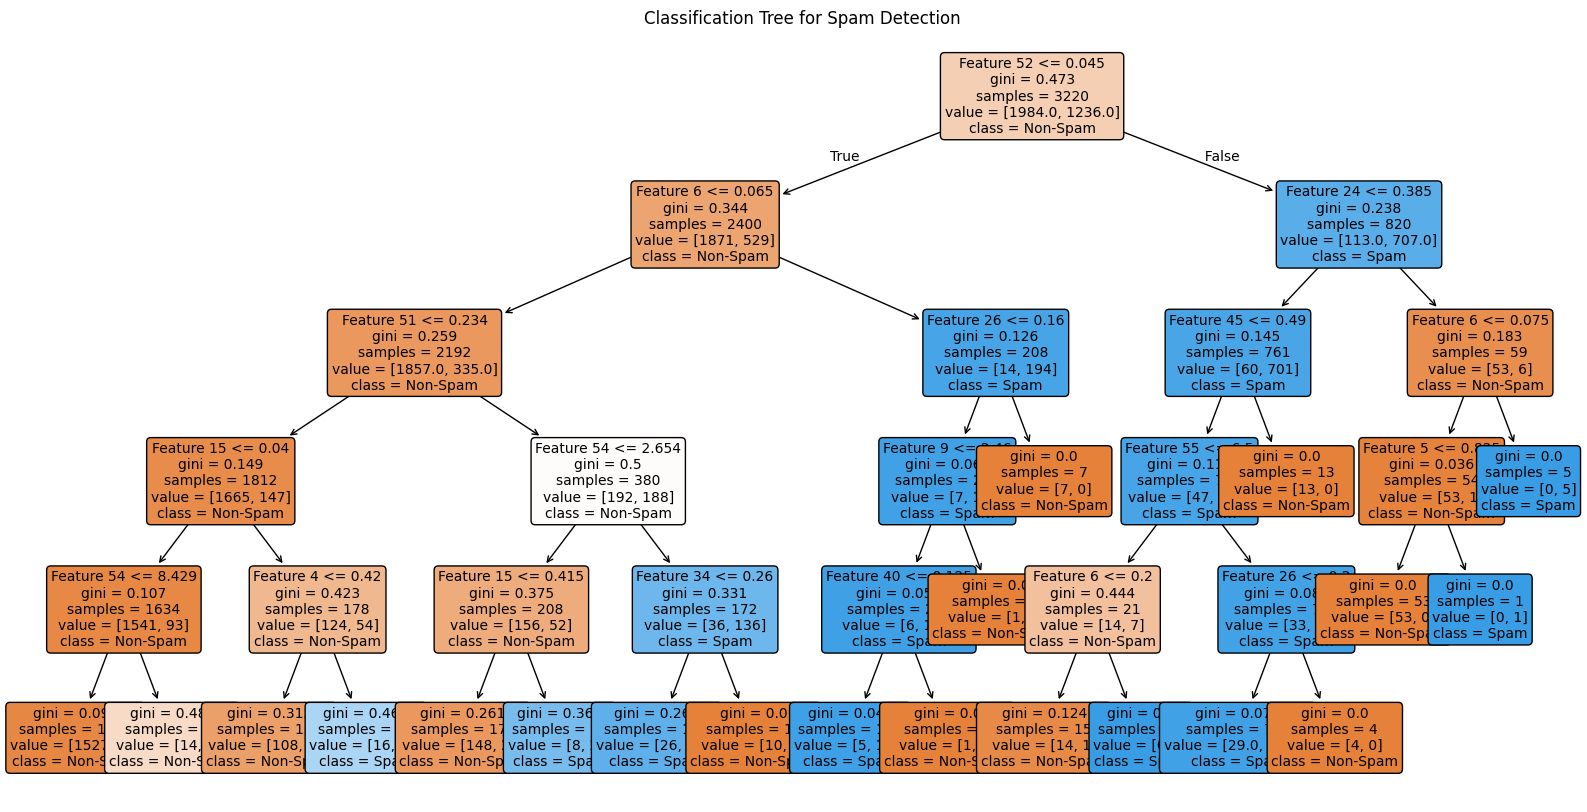

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('spambase.data', header=None)

# Replace missing values with 0
data = data.fillna(0)

# Separate features and target variable
X = data.iloc[:, :-1]  # All columns except the last one are features
y = data.iloc[:, -1]   # The last column is the target variable (spam or not spam)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the CART model with a maximum depth of 5
cart_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model on the training data
cart_model.fit(X_train, y_train)

# Predict on the test set
y_pred = cart_model.predict(X_test)

# Calculate accuracy and test error
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

# Print the CART Test Error
print(f"CART Model Accuracy: {accuracy:.4f}")
print(f"CART Test Error: {test_error:.4f}")

# Plot the classification tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed for readability
plot_tree(
    cart_model,
    filled=True,
    feature_names=[f'Feature {i}' for i in range(X.shape[1])],
    class_names=['Non-Spam', 'Spam'],
    rounded=True,
    fontsize=10
)

# Display the plot
plt.title("Classification Tree for Spam Detection")
plt.show()


3.2. (5 points) Now, also build a random forest model. Randomly shuffle the data and partition to use
75% for training and the remaining 25% for testing. Compare and report the test error for your
classification tree and random forest models on testing data. Plot the curve of test error (total
misclassification error rate) versus the number of trees for the random forest, and plot the test
error for the CART model (which should be a constant with respect to the number of trees).

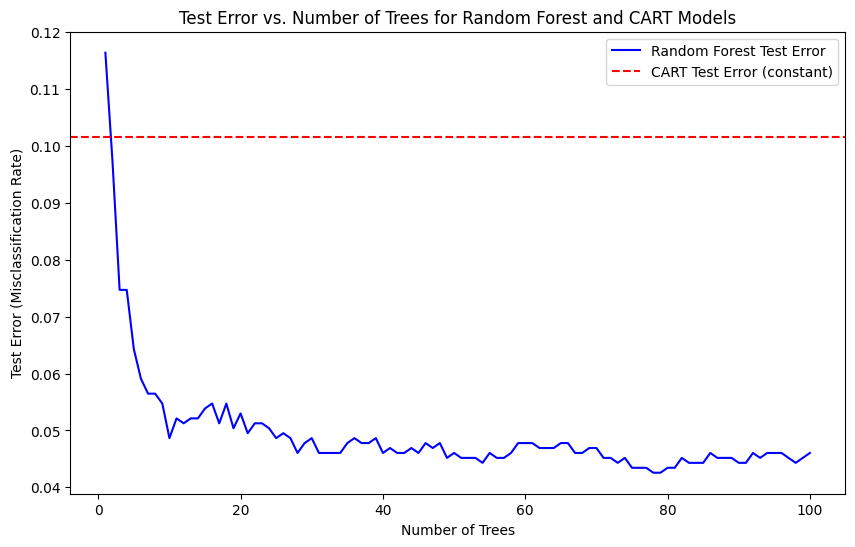

CART Model Test Error: 0.1017
Random Forest Test Error with optimal trees (min error): 0.0426


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Step 1: Load and prepare the data

data = pd.read_csv('spambase.data', header=None)

# Replace missing values with 0
data = data.fillna(0)

# Separate features and target variable
X = data.iloc[:, :-1]  # All columns except the last one are features
y = data.iloc[:, -1]   # The last column is the target variable (spam or not spam)

# Step 2: Shuffle and split the data into training and testing sets
# -----------------------------------------------------------------
# Randomly shuffle the data and split it into 75% training and 25% testing
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Train a CART model
# ---------------------------
# Initialize and train the CART (Decision Tree) model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Predict on the test set and calculate test error for the CART model
y_pred_cart = cart_model.predict(X_test)
cart_test_error = 1 - accuracy_score(y_test, y_pred_cart)

# Step 4: Train and evaluate Random Forest model with varying tree counts
# -----------------------------------------------------------------------
# Test different numbers of trees in the Random Forest and record the test error for each
tree_counts = range(1, 101)  # Testing from 1 to 100 trees
rf_test_errors = []

for n_trees in tree_counts:
    # Initialize and train the Random Forest model with n_trees
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set and calculate test error
    y_pred_rf = rf_model.predict(X_test)
    rf_test_error = 1 - accuracy_score(y_test, y_pred_rf)
    rf_test_errors.append(rf_test_error)

# Step 5: Plot the results
# ------------------------
# Create a plot showing test error vs. number of trees for the Random Forest model,
# and a constant test error line for the CART model.

plt.figure(figsize=(10, 6))

# Plot test error for Random Forest as a function of the number of trees
plt.plot(tree_counts, rf_test_errors, label="Random Forest Test Error", color='blue')

# Plot the constant test error for CART model
plt.axhline(y=cart_test_error, color='red', linestyle='--', label=f"CART Test Error (constant)")

# Add labels, title, and legend
plt.xlabel("Number of Trees")
plt.ylabel("Test Error (Misclassification Rate)")
plt.title("Test Error vs. Number of Trees for Random Forest and CART Models")
plt.legend()
plt.show()

# Step 6: Output test errors for comparison
# -----------------------------------------
# Print the test errors for both models to compare
print(f"CART Model Test Error: {cart_test_error:.4f}")
print(f"Random Forest Test Error with optimal trees (min error): {min(rf_test_errors):.4f}")


3.3. (10 points) Fit a series of random-forest classifiers to the data to explore the sensitivity to the
parameter ν (the number of variables selected at random to split). Plot both the OOB error as
well as the test error against a suitably chosen range of values for ν.

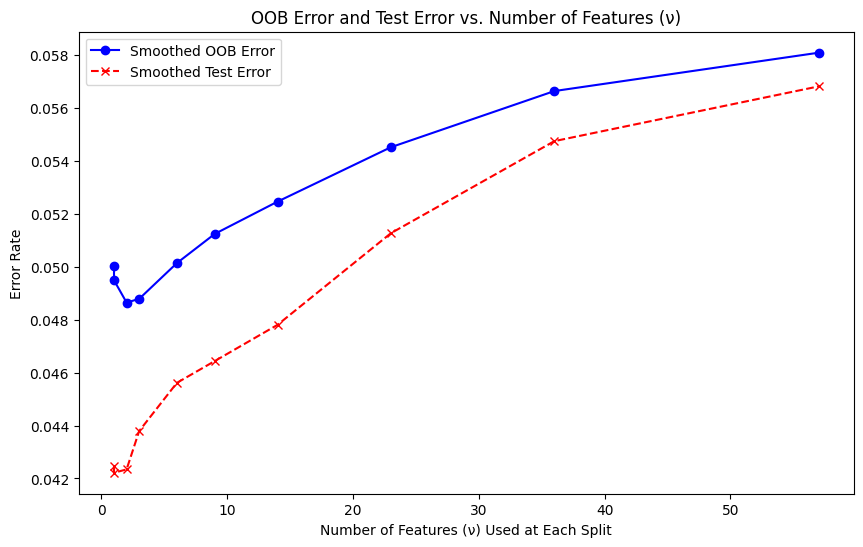

Minimum OOB Error: 0.0470 at ν = 3
Minimum Test Error: 0.0408 at ν = 2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Step 1: Load and Prepare the Data
# ---------------------------------
data = pd.read_csv('spambase.data', header=None)

# Replace missing values with 0
data = data.fillna(0)

# Separate features and target variable
X = data.iloc[:, :-1]  # All columns except the last one are features
y = data.iloc[:, -1]   # The last column is the target variable (spam or not spam)

# Randomly shuffle the data and split into training and testing sets
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Define ν (number of features to consider at each split)
# ---------------------------------------------------------------
# Logarithmically spaced ν values for better granularity
nu_values = list(map(int, np.logspace(0, np.log10(X.shape[1]), num=10)))

# Step 3: Initialize Lists for Storing Errors
# -------------------------------------------
oob_errors = []  # Out-of-Bag errors
test_errors = []  # Test errors

# Step 4: Loop Over ν Values and Train Random Forest Models
# ---------------------------------------------------------
for nu in nu_values:
    # Train the Random Forest model with OOB enabled
    rf_model = RandomForestClassifier(n_estimators=100, max_features=nu, oob_score=True, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Calculate OOB error (1 - OOB accuracy)
    oob_error = 1 - rf_model.oob_score_
    oob_errors.append(oob_error)
    
    # Predict on the test set and calculate test error
    y_pred_rf = rf_model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_rf)
    test_errors.append(test_error)

# Step 5: Smooth the Error Rates for Visualization
# -------------------------------------------------
oob_errors_smooth = gaussian_filter1d(oob_errors, sigma=1)
test_errors_smooth = gaussian_filter1d(test_errors, sigma=1)

# Step 6: Plot the Errors
# ------------------------
plt.figure(figsize=(10, 6))
# Plot smoothed OOB errors
plt.plot(nu_values, oob_errors_smooth, label="Smoothed OOB Error", color="blue", marker="o")
# Plot smoothed Test errors
plt.plot(nu_values, test_errors_smooth, label="Smoothed Test Error", color="red", linestyle="--", marker="x")
# Add labels, title, and legend
plt.xlabel("Number of Features (ν) Used at Each Split")
plt.ylabel("Error Rate")
plt.title("OOB Error and Test Error vs. Number of Features (ν)")
plt.legend()
plt.show()

# Step 7: Print Minimum Errors for Reference
# -------------------------------------------
min_oob_error = min(oob_errors)
min_test_error = min(test_errors)
optimal_nu_oob = nu_values[oob_errors.index(min_oob_error)]
optimal_nu_test = nu_values[test_errors.index(min_test_error)]

print(f"Minimum OOB Error: {min_oob_error:.4f} at ν = {optimal_nu_oob}")
print(f"Minimum Test Error: {min_test_error:.4f} at ν = {optimal_nu_test}")


3.4. (10 points) Now, we will use a one-class SVM approach for spam filtering. Randomly shuffle
the data and partition to use 75% for training and the remaining 25% for testing. Extract all
non-spam emails from the training block (75% of data you have selected) to build the one-class
kernel SVM using RBF kernel. Then apply it to the 25% of data reserved for testing (thus, this
is a novelty detection situation), and report the total misclassification error rate on these testing
data. Tune your models appropriately to achieve good performance, i.e. by tuning the kernal
bandwidth or other parameters. Give a short explanation on how you reached your final error
rate and whether you feel this is a good model.

Best Misclassification Error: 0.2598
Optimal nu: 0.12, Optimal gamma: 0.005
Top Results:
      nu  gamma     Error  Precision    Recall  F1-Score
9   0.12  0.005  0.259774   0.699531  0.635394  0.665922
10  0.12  0.010  0.264118   0.656546  0.737740  0.694779
1   0.10  0.005  0.264987   0.689815  0.635394  0.661487
18  0.15  0.010  0.264987   0.655303  0.737740  0.694082
17  0.15  0.005  0.265856   0.683973  0.646055  0.664474


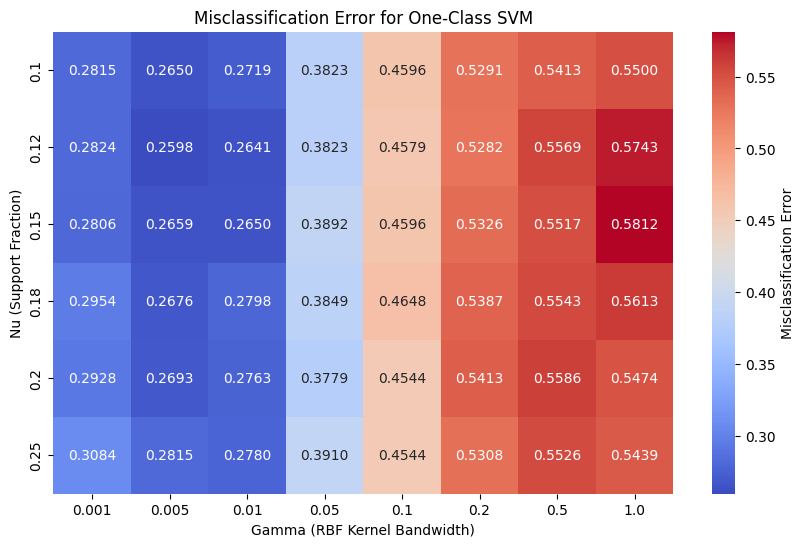

In [7]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# -------------------------
data = pd.read_csv('spambase.data', header=None)
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target (1 = spam, 0 = non-spam)

# Step 2: Shuffle and partition the data
# --------------------------------------
# Randomly shuffle the data and split into 75% training and 25% testing
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Reset indices to align X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Extract non-spam emails for training
X_train_non_spam = X_train[y_train == 0]

# Step 3: Define parameter ranges for grid search
# -----------------------------------------------
nu_values = [0.1, 0.12, 0.15, 0.18, 0.2, 0.25]
gamma_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]

# Step 4: Perform Grid Search for Optimal Parameters
# --------------------------------------------------
best_error = float("inf")
best_nu, best_gamma = None, None
results = []

for nu in nu_values:
    for gamma in gamma_values:
        # Train One-Class SVM
        svm_model = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma)
        svm_model.fit(X_train_non_spam)
        
        # Predict on the test set
        y_pred_svm = svm_model.predict(X_test)
        y_pred_binary = np.where(y_pred_svm == -1, 1, 0)  # Map -1 to spam (1) and +1 to non-spam (0)
        
        # Calculate metrics
        error = 1 - accuracy_score(y_test, y_pred_binary)
        precision = precision_score(y_test, y_pred_binary, zero_division=0)
        recall = recall_score(y_test, y_pred_binary, zero_division=0)
        f1 = f1_score(y_test, y_pred_binary, zero_division=0)
        
        results.append((nu, gamma, error, precision, recall, f1))
        
        # Update best parameters
        if error < best_error:
            best_error = error
            best_nu, best_gamma = nu, gamma

# Step 5: Print Best Results
# ---------------------------
print(f"Best Misclassification Error: {best_error:.4f}")
print(f"Optimal nu: {best_nu}, Optimal gamma: {best_gamma}")

# Convert results to a DataFrame for further analysis
columns = ["nu", "gamma", "Error", "Precision", "Recall", "F1-Score"]
results_df = pd.DataFrame(results, columns=columns)
results_df = results_df.sort_values("Error")

# Display the top results
print("Top Results:")
print(results_df.head())

# Step 6: Visualize Results
# --------------------------
plt.figure(figsize=(10, 6))

# Create a pivot table for the heatmap
heatmap_data = results_df.pivot(index="nu", columns="gamma", values="Error")

# Plot the heatmap
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    cbar_kws={"label": "Misclassification Error"}
)

plt.title("Misclassification Error for One-Class SVM")
plt.xlabel("Gamma (RBF Kernel Bandwidth)")
plt.ylabel("Nu (Support Fraction)")
plt.show()


Q4.2 - (5 points) Use the data.mat file to perform local linear weighted linear regression. Using 5-fold
cross validation to tune the bandwidth parameter h, report a plot showing your cross validation
curve and provide your optimal bandwidth, h.

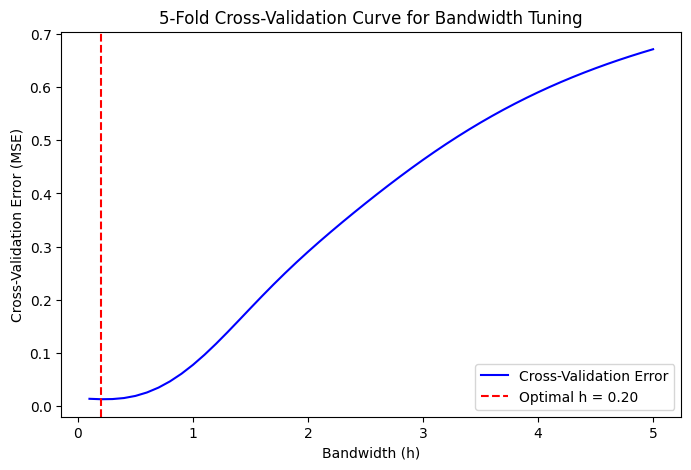

Optimal Bandwidth (h): 0.20
Minimum Cross-Validation Error: 0.0130


In [20]:
import numpy as np
from sklearn.model_selection import KFold
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Step 1: Load data
# -----------------
data = loadmat('data.mat')
X = data['data'][:, 0].reshape(-1, 1)  # X values (first column)
Y = data['data'][:, 1].reshape(-1, 1)  # Y values (second column)

# Step 2: Gaussian Kernel Function
# --------------------------------
def gaussian_kernel(x, x_i, h):
    """Compute Gaussian kernel weight."""
    return np.exp(-np.sum((x - x_i) ** 2) / (2 * h ** 2))

# Step 3: Locally Weighted Linear Regression
# ------------------------------------------
def locally_weighted_linear_regression(X, Y, query_point, h):
    """
    Perform locally weighted linear regression for a single query point.
    Arguments:
    - X: Training data (features)
    - Y: Training data (targets)
    - query_point: Point where prediction is required
    - h: Bandwidth parameter

    Returns:
    - Predicted value for the query_point
    """
    # Compute weights
    W = np.diag([gaussian_kernel(query_point, x_i, h) for x_i in X])
    # Augment design matrix with intercept
    X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))
    # Compute beta coefficients using weighted least squares
    beta = np.linalg.pinv(X_augmented.T @ W @ X_augmented) @ X_augmented.T @ W @ Y
    # Predict for the query point
    prediction = np.array([1, *query_point]) @ beta
    return prediction

# Step 4: K-Fold Cross-Validation
# -------------------------------
def cross_validate_bandwidth(X, Y, h_values, k_folds=5):
    """
    Perform k-fold cross-validation to tune bandwidth parameter h.
    Arguments:
    - X: Input features
    - Y: Target values
    - h_values: Array of bandwidth values to test
    - k_folds: Number of folds for cross-validation

    Returns:
    - List of cross-validation errors for each h value
    """
    cv_errors = []
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    for h in h_values:
        fold_errors = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            Y_train, Y_val = Y[train_index], Y[val_index]
            # Predict for validation set
            predictions = np.array([locally_weighted_linear_regression(X_train, Y_train, x_val, h) for x_val in X_val])
            # Compute Mean Squared Error (MSE) for this fold
            fold_errors.append(np.mean((Y_val.flatten() - predictions.flatten()) ** 2))
        # Average error across folds
        cv_errors.append(np.mean(fold_errors))
    return cv_errors

# Step 5: Tune Bandwidth and Plot Results
# ---------------------------------------
h_values = np.linspace(0.1, 5.0, 50)  # Bandwidth values to test
cv_errors = cross_validate_bandwidth(X, Y, h_values)

# Find optimal bandwidth
optimal_h = h_values[np.argmin(cv_errors)]

# Plot cross-validation curve
plt.figure(figsize=(8, 5))
plt.plot(h_values, cv_errors, label="Cross-Validation Error", color="blue")
plt.axvline(x=optimal_h, color="red", linestyle="--", label=f"Optimal h = {optimal_h:.2f}")
plt.xlabel("Bandwidth (h)")
plt.ylabel("Cross-Validation Error (MSE)")
plt.title("5-Fold Cross-Validation Curve for Bandwidth Tuning")
plt.legend()
plt.show()

# Print results
print(f"Optimal Bandwidth (h): {optimal_h:.2f}")
print(f"Minimum Cross-Validation Error: {min(cv_errors):.4f}")



4.3. (5 points) Using the tuned hyper-parameter h to make a prediction for x = −1.5. Provide the
predicted y value, and report a plot showing your training data, prediction curve, and a marker
indicating your prediction.

Predicted y value for x = -1.5: 1.8142160145397674


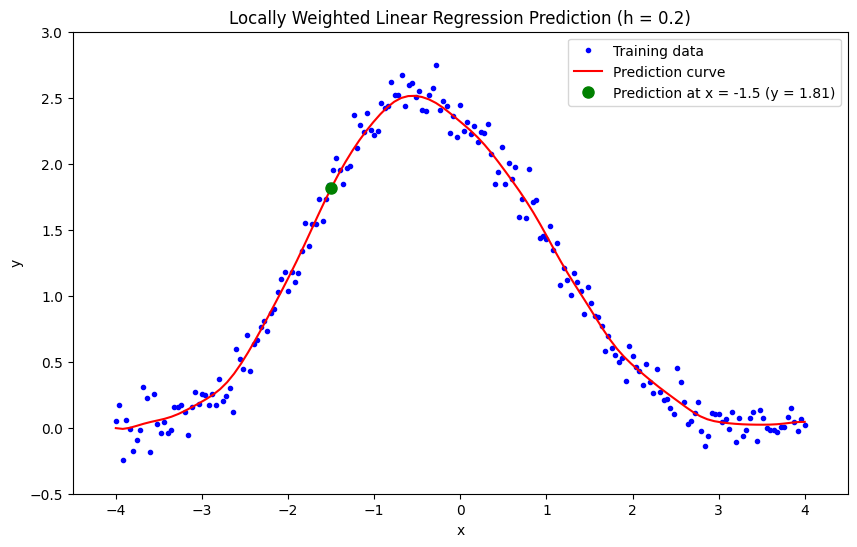

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the optimal bandwidth from cross-validation
optimal_h = 0.2  # From above

# Predict y for x = -1.5 using locally weighted linear regression
x_query = np.array([-1.5])
y_pred = locally_weighted_linear_regression(X, Y, x_query, optimal_h)

print(f"Predicted y value for x = -1.5: {y_pred[0]}")

# Generate predictions for a range of x-values to plot the prediction curve
x_range = np.linspace(-4, 4, 100)  # Adjust range as needed for visualization
y_predictions = [locally_weighted_linear_regression(X, Y, np.array([x_val]), optimal_h) for x_val in x_range]

# Plot the training data, prediction curve, and the prediction point
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'b.', label="Training data")
plt.plot(x_range, y_predictions, 'r-', label="Prediction curve")
plt.plot(x_query, y_pred, 'go', markersize=8, label=f"Prediction at x = -1.5 (y = {y_pred[0]:.2f})")

# Add axis limits 
plt.xlim(-4.5, 4.5)
plt.ylim(-0.5, 3.0)

# Set labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Locally Weighted Linear Regression Prediction (h = {optimal_h})")
plt.legend()

# Save the plot
plt.savefig("Prediction_LocallyWeighted.png")

plt.show()
